## P6.7.1
-----

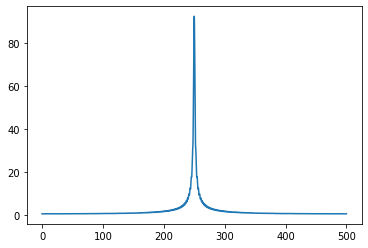

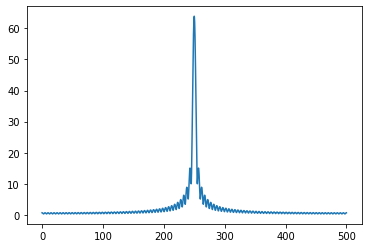

In [2]:
import numpy as np
import matplotlib.pyplot as plt

frequency, tau = 250, 0.2
f_sample = 1000
duration = 10

t = np.arange(0, duration, 1/f_sample)
n = len(t)
f = np.cos(2 * np.pi * frequency * t) * np.exp(-t/tau)

for thresh in (0.5, 0.2):
    f[t > thresh] = 0.

    F = np.fft.rfft(f)
    freq = np.fft.rfftfreq(n, 1/f_sample)
    plt.plot(freq, abs(F))
    plt.show()

## P6.7.2
-----

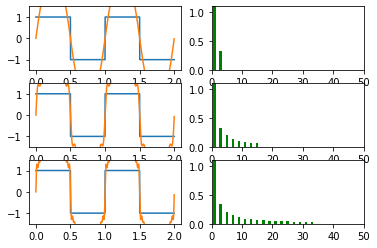

In [7]:
import numpy as np
import matplotlib.pyplot as plt

n = 2048
T = 1
freq = 1 / T
duration = 2
t = np.arange(0, duration, duration/n)
f = np.ones(n)
f[(t >= T/2) & (t < T)] = -1
f[t >= T] = f[t < T]


def fourier_expansion(num_terms: int, frequency: float, t: np.array) -> float:
    fourier_square = np.zeros(n)

    for k in range(num_terms):
        fac = 2 * k - 1
        fourier_square += np.sin(2 * np.pi * fac * frequency * t)/ fac
    return 4 / np.pi * fourier_square


for i, num_terms in enumerate((3, 9, 18)):
    fourier_square = fourier_expansion(num_terms, freq, t)

    F = (duration/n) / (4/np.pi) * np.abs(np.fft.rfft(fourier_square))
    Fdft = (duration/n) / (4/np.pi) * np.abs(np.fft.rfft(f))
    Ffreq = np.fft.rfftfreq(n, duration/n)

    plt.subplot(3,2,i*2+1) 
    plt.plot(t,f)
    plt.plot(t, fourier_square)
    plt.ylim(-1.5, 1.5)
    plt.subplot(3,2,(i+1)*2)
    plt.bar(Ffreq, F, color='g')
    plt.xlim(0,50)
    plt.ylim(0,1.1)

plt.show()


## P6.7.3
-----

In [8]:
# Bro how?